In [ ]:
import panda_data 
import pandas as pd
from token_manager import get_valid_token
import tushare as ts
import numpy as np
import mplfinance as mpf

In [ ]:
token = get_valid_token()
if token:
    # 初始化 tushare
    ts.set_token(token)
    pro = ts.pro_api()


✓ 从缓存读取到Token，正在验证...
 ✓ Token验证成功


In [ ]:
#获取主力合约TF.CFX每日对应的月合约
LC_dominant_id = pro.fut_mapping(ts_code='LC.GFE',start_date='20230101',end_date='20251030')

In [22]:
LC_dominant_id

,ts_code,trade_date,mapping_ts_code
0,LC.GFE,20251031,LC2601.GFE
1,LC.GFE,20251030,LC2601.GFE
2,LC.GFE,20251029,LC2601.GFE
3,LC.GFE,20251028,LC2601.GFE
4,LC.GFE,20251027,LC2601.GFE
...,...,...,...
547,LC.GFE,20230727,LC2401.GFE
548,LC.GFE,20230726,LC2401.GFE
549,LC.GFE,20230725,LC2401.GFE
550,LC.GFE,20230724,LC2401.GFE


In [4]:
data_lc_df=pd.DataFrame()
data_lc_dict={}
for date, symbol in LC_dominant_id[['trade_date', 'mapping_ts_code']].values:
    
    # 1. Extract the instrument code (letters before the dot)
    # This assumes 'symbol' is a string like 'RB.SHF' or 'CU.SHF'
    # .split('.') gives ['RB', 'SHF'], and [0] selects 'RB'.
    instrument_code = symbol.split('.')[0]
    
    # 2. Get the market data
    # Note: 'trade_date' is used for both start_date and the variable 'date'
    temp = panda_data.get_market_min_data(
        instrument_code,
        start_date=date,       # Using the 'date' variable for the start date
        end_date=date,         # Using the 'date' variable for the end date
        symbol_type='future'
    )
    data_lc_df=pd.concat([data_lc_df,temp])
    # 3. Store the result in the dictionary with the original full symbol as the key
    # data_lc_dict[instrument_code] = temp



In [2]:
date ="20231207"
x=  panda_data.get_market_min_data(
        "LC2401",
        start_date=date,       # Using the 'date' variable for the start date
        end_date=date,         # Using the 'date' variable for the end date
        symbol_type='future'
    )
print(x)

                   date  symbol    close dominant_id exchange     high  \
0   2023-12-07 15:00:00  LC2401  95600.0      LC2401     GFEX  95600.0   
1   2023-12-07 14:59:00  LC2401  95600.0      LC2401     GFEX  95600.0   
2   2023-12-07 14:58:00  LC2401  95600.0      LC2401     GFEX  95600.0   
3   2023-12-07 14:57:00  LC2401  95600.0      LC2401     GFEX  95600.0   
4   2023-12-07 14:56:00  LC2401  95600.0      LC2401     GFEX  95600.0   
..                  ...     ...      ...         ...      ...      ...   
220 2023-12-07 09:05:00  LC2401  93450.0      LC2401     GFEX  93450.0   
221 2023-12-07 09:04:00  LC2401  92950.0      LC2401     GFEX  93550.0   
222 2023-12-07 09:03:00  LC2401  93350.0      LC2401     GFEX  94300.0   
223 2023-12-07 09:02:00  LC2401  94150.0      LC2401     GFEX  94400.0   
224 2023-12-07 09:01:00  LC2401  93750.0      LC2401     GFEX  95500.0   

         low     open trading_code trading_date underlying_symbol   volume  
0    95600.0  95600.0       lc2401

In [ ]:
y = pro.df = pro.ft_mins(ts_code='LC2407.GFE', freq='1min', start_date='2024-12-29 09:00:00', end_date='2023-0-07 19:00:00')
print(y)

Empty DataFrame
Columns: [ts_code, trade_time, open, close, high, low, vol, amount, oi]
Index: []


In [5]:
data_lc_df.to_csv('data_lc_df.csv',index=False)

In [2]:
data_lc_df = pd.read_csv('data_lc_df.csv')

In [6]:
data_lc_df.head(10)

,date,symbol,close,dominant_id,exchange,high,low,open,trading_code,trading_date,underlying_symbol,volume
0,2025-10-30 15:00:00,LC2601,83400.0,LC2601,GFEX,83520.0,83400.0,83420.0,lc2601,20251030,LC,4722.0
1,2025-10-30 14:59:00,LC2601,83420.0,LC2601,GFEX,83460.0,83360.0,83360.0,lc2601,20251030,LC,3267.0
2,2025-10-30 14:58:00,LC2601,83380.0,LC2601,GFEX,83480.0,83300.0,83380.0,lc2601,20251030,LC,3940.0
3,2025-10-30 14:57:00,LC2601,83380.0,LC2601,GFEX,83620.0,83340.0,83620.0,lc2601,20251030,LC,6447.0
4,2025-10-30 14:56:00,LC2601,83620.0,LC2601,GFEX,83740.0,83580.0,83720.0,lc2601,20251030,LC,4450.0
5,2025-10-30 14:55:00,LC2601,83720.0,LC2601,GFEX,83800.0,83680.0,83760.0,lc2601,20251030,LC,2338.0
6,2025-10-30 14:54:00,LC2601,83780.0,LC2601,GFEX,83820.0,83720.0,83800.0,lc2601,20251030,LC,1082.0
7,2025-10-30 14:53:00,LC2601,83820.0,LC2601,GFEX,83820.0,83680.0,83680.0,lc2601,20251030,LC,2026.0
8,2025-10-30 14:52:00,LC2601,83700.0,LC2601,GFEX,83800.0,83700.0,83760.0,lc2601,20251030,LC,1503.0
9,2025-10-30 14:51:00,LC2601,83760.0,LC2601,GFEX,83800.0,83720.0,83740.0,lc2601,20251030,LC,1253.0


In [7]:
data_lc_df.columns

Index(['date', 'symbol', 'close', 'dominant_id', 'exchange', 'high', 'low',
       'open', 'trading_code', 'trading_date', 'underlying_symbol', 'volume'],
      dtype='object')

In [7]:
def build_bin_ohlc(data_frame: pd.DataFrame, minutes: int, fig: bool = False, x_threshold = None):
    """
    Groups tick/intraday data into OHLCV bars based on a specified number of minutes.

    Args:
        data_frame: DataFrame with datetime index and columns including 'open', 
                    'high', 'low', 'close', and 'volume'.
        minutes: The time interval in minutes to aggregate the data (e.g., 3 for 3-minute bars).
        fig: If True, plots the resulting OHLCV candles and returns the figure and axes.
             If False (default), returns the OHLCV DataFrame.

    Returns:
        pd.DataFrame (if fig=False) or tuple (mpf.Figure, List[mpf.Axes]) (if fig=True).
    """
    
    # 1. Ensure 'date' is a datetime object and set as index
    # We use .copy() to avoid SettingWithCopyWarning if the input data_frame
    # is a slice of another DataFrame.
    df = data_frame.copy()
    
    # Check if 'date' column exists and convert to datetime if necessary
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date')
    
    # Check if index is datetime type (essential for resample)
    if not isinstance(df.index, pd.DatetimeIndex):
         raise ValueError("DataFrame index must be a DatetimeIndex after processing 'date' column.")

    # 2. Define the aggregation logic for OHLCV
    # '3T' for 3 minutes, '5T' for 5 minutes, etc. 'T' stands for minutes.
    resample_rule = f'{minutes}min'
    
    # Define how each column should be aggregated
    agg_dict = {
        'open': 'first',  # Open price is the first price in the period
        'high': 'max',    # High price is the max price in the period
        'low': 'min',     # Low price is the min price in the period
        'close': 'last',  # Close price is the last price in the period
        'volume': 'sum'   # Volume is the sum of volume in the period
    }
    
    # Note: We assume the input DataFrame has 'open', 'high', 'low', 'close', and 'volume' 
    # columns for the aggregation. If it only has 'close', you might use:
    # resampled_df = df['close'].resample(resample_rule).ohlc().to_frame() 
    # and separately resample and concatenate the volume.
    # Given your columns, we use the detailed agg method for precision.

    # Filter the aggregation dictionary to only include columns present in the DataFrame
    valid_cols = [col for col in agg_dict.keys() if col in df.columns]
    final_agg_dict = {col: agg_dict[col] for col in valid_cols}
    
    if not final_agg_dict:
        raise ValueError("DataFrame is missing required OHLCV columns ('open', 'high', 'low', 'close', 'volume')")

    # 3. Resample and Aggregate
    ohlcv_df = df.resample(resample_rule, closed='left', label='left').agg(final_agg_dict)
    
    # Remove rows where all OHLCV data is NaN (periods with no trades)
    ohlcv_df = ohlcv_df.dropna(subset=['close'])
    
    # 4. Optional Plotting using mplfinance
    if fig:
        # mplfinance requires column names to be capitalized: Open, High, Low, Close, Volume
        ohlcv_df.columns = [col.capitalize() for col in ohlcv_df.columns]

        plot_df = ohlcv_df
        if x_threshold is not None and len(ohlcv_df) > x_threshold:
            # Select only the last 'x_threshold' number of rows for plotting
            plot_df = ohlcv_df.iloc[-x_threshold:]
        
        # Plot and return figure/axes tuple
        # Style set for better visibility of volume
        return mpf.plot(
            plot_df, 
            type='candle', 
            volume=True, 
            style='charles', 
            title=f'{minutes}-Minute OHLCV Chart',
            returnfig=True
        )
    
    # 5. Return the resulting DataFrame
    return ohlcv_df

In [ ]:
three_min_ohlc = build_bin_ohlc(data_lc_df, 3)

(<Figure size 800x575 with 4 Axes>,
 [<Axes: ylabel='Price'>, <Axes: >, <Axes: ylabel='Volume'>, <Axes: >])

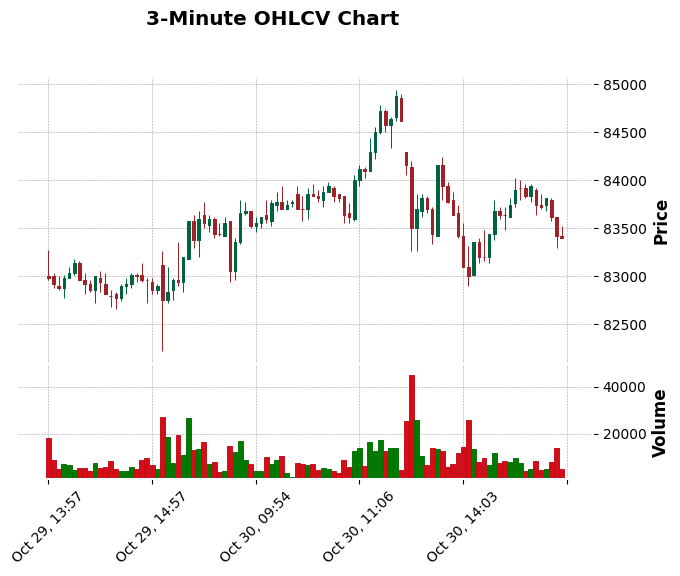

In [9]:
build_bin_ohlc(data_lc_df, 3, fig=True,x_threshold=100)

In [11]:
import panda_data 
result = panda_data.get_future_list()
print(result)

       symbol
0       A0303
1       A0305
2       A0307
3       A0309
4       A0311
...       ...
10007  ZN2606
10008  ZN2607
10009  ZN2608
10010  ZN2609
10011  ZN2610

[10012 rows x 1 columns]


In [10]:
three_min_ohlc.to_csv('three_min_ohlc.csv')

C:\Users\Jinting\AppData\Local\Temp\ipykernel_25804\2413190619.py:57: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlcv_df = df.resample(resample_rule, closed='left', label='left').agg(final_agg_dict)
o:\Coding\data_pre\.venv\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


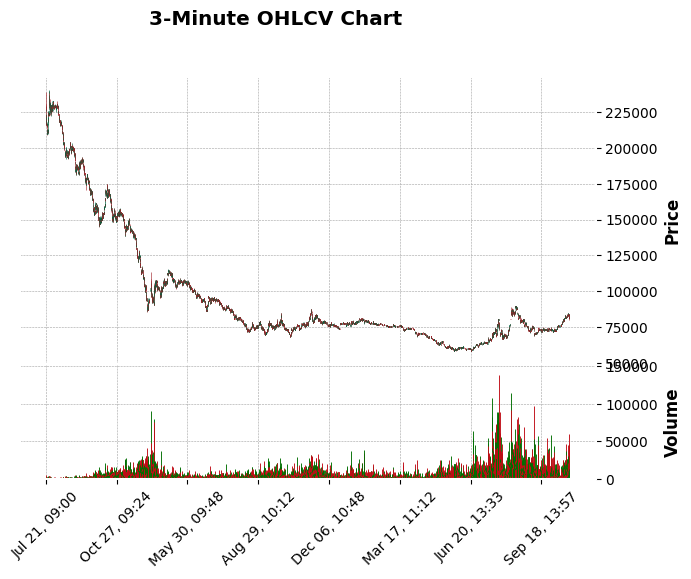

In [10]:
three_min_ohlc = build_bin_ohlc(data_lc_df, 3, True)

In [9]:
three_min_ohlc

,open,high,low,close,volume
date,,,,,
2023-07-21 09:00:00,238900.0,238900.0,226000.0,228850.0,5215.0
2023-07-21 09:03:00,228850.0,230250.0,225500.0,227000.0,2569.0
2023-07-21 09:06:00,227000.0,228900.0,225400.0,228850.0,1951.0
2023-07-21 09:09:00,228950.0,229000.0,227500.0,228000.0,1204.0
2023-07-21 09:12:00,228000.0,228450.0,226250.0,226350.0,923.0
...,...,...,...,...,...
2025-10-31 14:48:00,81020.0,81020.0,80600.0,80680.0,35142.0
2025-10-31 14:51:00,80700.0,80740.0,80500.0,80720.0,25254.0
2025-10-31 14:54:00,80700.0,80860.0,80260.0,80680.0,29299.0


In [ ]:
def build_bin_vol_ohlc(data_dict, bin_size=0.1, x_threshold=None, symbols=None, max_symbols=None):
    """
    Build OHLC per cumulative volume growth bin for each symbol, same logic as plotting,
    and return a dict: symbol -> DataFrame with columns [Open, High, Low, Close] indexed by bin order.
    Also returns a flat DataFrame with symbol column and bin_index.
    """
    if not data_dict:
        return {}, pd.DataFrame()

    symbols_to_process = list(data_dict.keys())
    if symbols:
        symbols_to_process = [s for s in symbols_to_process if s in symbols]
    if max_symbols:
        symbols_to_process = symbols_to_process[:max_symbols]

    # optional prefilter based on cum vol threshold like in plot function
    if x_threshold is not None:
        filtered = []
        for symbol in symbols_to_process:
            df = data_dict[symbol].copy()
            first_vol_idx = df['volume'][df['volume'] > 0].first_valid_index()
            if pd.isna(first_vol_idx):
                continue
            df['cumulative_volume'] = df['volume'].cumsum()
            initial_cum_vol = df.loc[first_vol_idx, 'cumulative_volume']
            if initial_cum_vol == 0:
                continue
            df['cum_vol_growth'] = (df['cumulative_volume'] / initial_cum_vol) - 1
            if df['cum_vol_growth'].max() >= x_threshold:
                filtered.append(symbol)
        symbols_to_process = filtered

    per_symbol = {}
    flat_rows = []

    for symbol in symbols_to_process:
        df = data_dict[symbol].copy()
        df = df.sort_values('candle_begin_time').reset_index(drop=True)

        # Expect cum_vol_growth computed in the plotting pre-step. If not, compute here safely.
        if 'cum_vol_growth' not in df.columns:
            first_vol_idx = df['volume'][df['volume'] > 0].first_valid_index()
            if pd.isna(first_vol_idx):
                continue
            df['cumulative_volume'] = df['volume'].cumsum()
            initial_cum_vol = df.loc[first_vol_idx, 'cumulative_volume']
            if initial_cum_vol == 0:
                continue
            df['cum_vol_growth'] = (df['cumulative_volume'] / initial_cum_vol) - 1

        if x_threshold is not None:
            if isinstance(x_threshold, (tuple, list)) and len(x_threshold) == 2:
                min_thresh, max_thresh = x_threshold
                df = df[(df['cum_vol_growth'] >= min_thresh) & (df['cum_vol_growth'] <= max_thresh)]
            elif isinstance(x_threshold, (int, float)):
                df = df[abs(df['cum_vol_growth']) <= abs(x_threshold)]

        max_growth = df['cum_vol_growth'].max()
        if not np.isfinite(max_growth) or max_growth <= 0:
            continue

        bins = np.arange(0, max_growth + bin_size, bin_size)
        if len(bins) < 2:
            continue
        df['vol_growth_bin'] = pd.cut(df['cum_vol_growth'], bins=bins, right=False, include_lowest=True)

        ohlc_by_vol = df.groupby('vol_growth_bin', observed=False).agg(
            Open=('open', 'first'),
            High=('high', 'max'),
            Low=('low', 'min'),
            Close=('close', 'last')
        ).reset_index(drop=True)
        ohlc_by_vol.dropna(inplace=True)

        if ohlc_by_vol.empty or len(ohlc_by_vol) < 3:
            continue

        # add engineered features on the bin-level
        ohlc_by_vol['Return'] = ohlc_by_vol['Close'].pct_change()
        ohlc_by_vol['HL_range'] = (ohlc_by_vol['High'] - ohlc_by_vol['Low']) / ohlc_by_vol['Open']
        ohlc_by_vol['OC_range'] = (ohlc_by_vol['Close'] - ohlc_by_vol['Open']) / ohlc_by_vol['Open']
        ohlc_by_vol['Body'] = (ohlc_by_vol['Close'] - ohlc_by_vol['Open']).abs() / ohlc_by_vol['Open']
        # technical indicators
        # ohlc_by_vol.ta.atr(length=14, append=True)
        ohlc_by_vol.ta.macd(fast=12, slow=26, signal=9, append=True)
        # ohlc_by_vol.ta.atr(length=14, append=True)
        # simple rolling features
        for w in (3, 5, 10, 15):
            ohlc_by_vol[f'return_mean_{w}'] = ohlc_by_vol['Return'].rolling(w).mean()
            ohlc_by_vol[f'return_std_{w}'] = ohlc_by_vol['Return'].rolling(w).std()
            ohlc_by_vol[f'hl_mean_{w}'] = ohlc_by_vol['HL_range'].rolling(w).mean()
            ohlc_by_vol.ta.rsi(length=w, append=True)
            ohlc_by_vol.ta.atr(length=w, append=True)


        # target: next-bin return positive?
        ohlc_by_vol['target'] = (ohlc_by_vol['Return'].shift(-1) > 0).astype(int)

        # drop the last row where target is NaN by shift
        ohlc_by_vol = ohlc_by_vol.iloc[:-1].copy()

        ohlc_by_vol['symbol'] = symbol
        ohlc_by_vol['bin_index'] = np.arange(len(ohlc_by_vol))
        per_symbol[symbol] = ohlc_by_vol
        flat_rows.append(ohlc_by_vol)

    flat = pd.concat(flat_rows, ignore_index=True) if flat_rows else pd.DataFrame()
    return per_symbol, flat
